In [1]:
#mports and Utilities
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from datetime import timedelta

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Bidirectional, LSTM, Dropout, Attention, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

In [2]:

#Load Data and Scaler

scaled_df = pd.read_csv(r'C:\Users\allif\Downloads\Crypto_stocks\data\processed\scaled_predictive_coins.csv', parse_dates=['Date'])

scaled_df.head()

# removing null values
scaled_df = scaled_df.dropna()

#Loading the minmax scaler for inverse transformation
scaler = joblib.load(r'C:\Users\allif\Downloads\Crypto_stocks\notebooks\minmax_scaler_close_prices.pkl')

In [ ]:
# Defining the Coins and Columns 
coins = {
    'BTC': {'col': 'BTC_close_scaled'},
    'ETH': {'col': 'ETH_close_scaled'},
    'LTC': {'col': 'LTC_close_scaled'},
    'Gold': {'col': 'Gold_close_scaled'}
}
feature_cols = [
    'BTC_close_scaled', 'ETH_close_scaled', 'LTC_close_scaled', 'Gold_close_scaled',
    'BTC_close_logret_scaled', 'ETH_close_logret_scaled', 'LTC_close_logret_scaled', 'Gold_close_logret_scaled'
]
lookback = 30
forecast_horizon = 14

In [4]:
# Sliding Window & Inverse Scaling ---
def create_sliding_window(df, lookback, forecast_horizon, feature_cols, target_col):
    X, Y = [], []
    for i in range(len(df) - lookback - forecast_horizon + 1):
        X.append(df[feature_cols].iloc[i:i+lookback].values)
        Y.append(df[target_col].iloc[i+lookback:i+lookback+forecast_horizon].values)
    return np.array(X), np.array(Y)

def inverse_close(scaled_arr, scaler, col_index):
    scaled_arr = np.array(scaled_arr)
    flat = scaled_arr.reshape(-1)
    arr = np.zeros((flat.shape[0], scaler.n_features_in_))
    arr[:, col_index] = flat
    inv = scaler.inverse_transform(arr)[:, col_index]
    return inv.reshape(scaled_arr.shape)

In [5]:
# BD-LSTM + Attention Model Builder ---
def build_bd_lstm_attention_model(lstm_units=64, dropout=0.2, lr=0.001):
    inp = Input(shape=(lookback, len(feature_cols)))
    x = Bidirectional(LSTM(lstm_units, return_sequences=True))(inp)
    x = Dropout(dropout)(x)
    # Attention Layer
    attn = Attention()([x, x])
    attn = Dropout(dropout)(attn)
    x = Concatenate()([x, attn])
    x = LSTM(lstm_units)(x)  # You can remove this LSTM for a simpler model
    x = Dropout(dropout)(x)
    out = Dense(forecast_horizon)(x)
    model = Model(inputs=inp, outputs=out)
    model.compile(optimizer=Adam(learning_rate=lr), loss='mse')
    return model


====== Processing BTC ======


C:\Users\allif\AppData\Local\Temp\ipykernel_5080\3813031924.py:14: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = KerasRegressor(build_fn=build_bd_lstm_attention_model, verbose=0)


Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END batch_size=16, dropout=0.2, epochs=10, lstm_units=64; total time=  15.1s
[CV] END batch_size=16, dropout=0.2, epochs=10, lstm_units=64; total time=  22.7s
[CV] END batch_size=16, dropout=0.2, epochs=10, lstm_units=64; total time=  39.5s
[CV] END batch_size=16, dropout=0.2, epochs=15, lstm_units=32; total time=  15.4s
[CV] END batch_size=16, dropout=0.2, epochs=15, lstm_units=32; total time=  24.6s
[CV] END batch_size=16, dropout=0.2, epochs=15, lstm_units=32; total time=  35.4s
[CV] END batch_size=32, dropout=0.2, epochs=10, lstm_units=64; total time=  12.9s
[CV] END batch_size=32, dropout=0.2, epochs=10, lstm_units=64; total time=  17.5s
[CV] END batch_size=32, dropout=0.2, epochs=10, lstm_units=64; total time=  23.6s
[CV] END batch_size=32, dropout=0.2, epochs=15, lstm_units=64; total time=  14.4s
[CV] END batch_size=32, dropout=0.2, epochs=15, lstm_units=64; total time=  34.6s
[CV] END batch_size=32, dropout=0.2, e

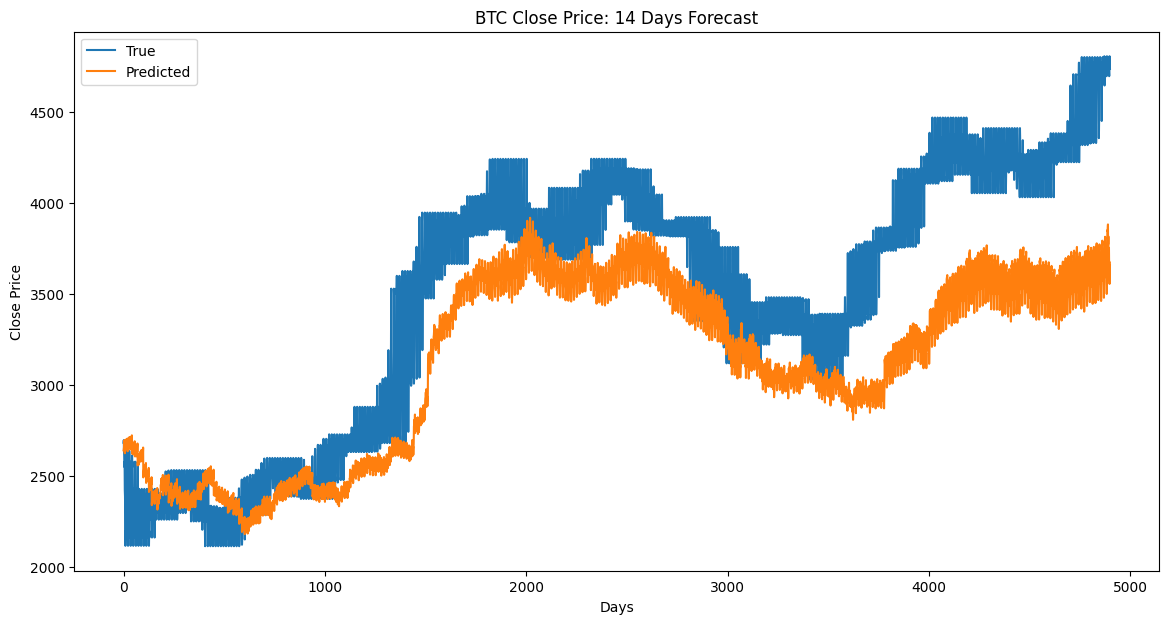

Saved BD-LSTM+Attention model for BTC

====== Processing ETH ======


C:\Users\allif\AppData\Local\Temp\ipykernel_5080\3813031924.py:14: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = KerasRegressor(build_fn=build_bd_lstm_attention_model, verbose=0)


Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END batch_size=32, dropout=0.2, epochs=10, lstm_units=32; total time=  12.3s
[CV] END batch_size=32, dropout=0.2, epochs=10, lstm_units=32; total time=  18.3s
[CV] END batch_size=32, dropout=0.2, epochs=10, lstm_units=32; total time=  25.8s
[CV] END batch_size=32, dropout=0.2, epochs=15, lstm_units=64; total time=  23.2s
[CV] END batch_size=32, dropout=0.2, epochs=15, lstm_units=64; total time=  40.4s
[CV] END batch_size=32, dropout=0.2, epochs=15, lstm_units=64; total time=  57.8s
[CV] END batch_size=32, dropout=0.1, epochs=10, lstm_units=64; total time=  21.1s
[CV] END batch_size=32, dropout=0.1, epochs=10, lstm_units=64; total time=  30.1s
[CV] END batch_size=32, dropout=0.1, epochs=10, lstm_units=64; total time=  36.2s
[CV] END batch_size=16, dropout=0.2, epochs=15, lstm_units=64; total time=  45.9s
[CV] END batch_size=16, dropout=0.2, epochs=15, lstm_units=64; total time= 1.5min
[CV] END batch_size=16, dropout=0.2, e

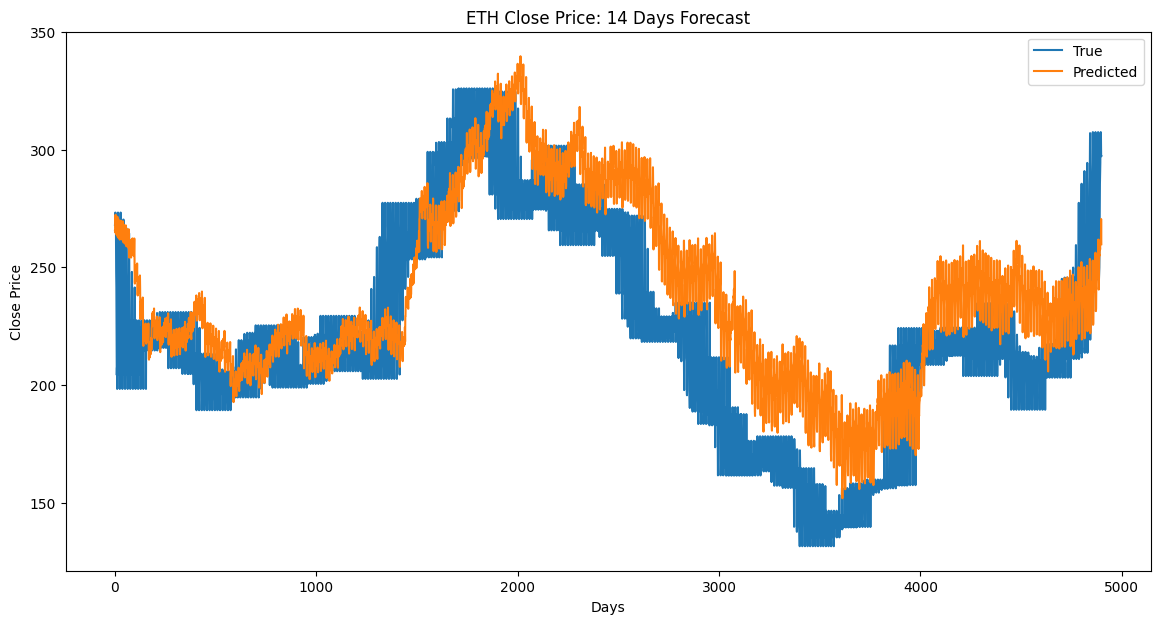

Saved BD-LSTM+Attention model for ETH

====== Processing LTC ======


C:\Users\allif\AppData\Local\Temp\ipykernel_5080\3813031924.py:14: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = KerasRegressor(build_fn=build_bd_lstm_attention_model, verbose=0)


Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END batch_size=16, dropout=0.1, epochs=10, lstm_units=32; total time=  15.5s
[CV] END batch_size=16, dropout=0.1, epochs=10, lstm_units=32; total time=  41.3s
[CV] END batch_size=16, dropout=0.1, epochs=10, lstm_units=32; total time=  56.5s
[CV] END batch_size=32, dropout=0.1, epochs=10, lstm_units=32; total time=  16.6s
[CV] END batch_size=32, dropout=0.1, epochs=10, lstm_units=32; total time=  25.5s
[CV] END batch_size=32, dropout=0.1, epochs=10, lstm_units=32; total time=  33.5s
[CV] END batch_size=32, dropout=0.1, epochs=15, lstm_units=64; total time=  35.0s
[CV] END batch_size=32, dropout=0.1, epochs=15, lstm_units=64; total time= 1.1min
[CV] END batch_size=32, dropout=0.1, epochs=15, lstm_units=64; total time= 1.6min
[CV] END batch_size=16, dropout=0.2, epochs=15, lstm_units=64; total time=  56.6s
[CV] END batch_size=16, dropout=0.2, epochs=15, lstm_units=64; total time= 3.2min
[CV] END batch_size=16, dropout=0.2, e

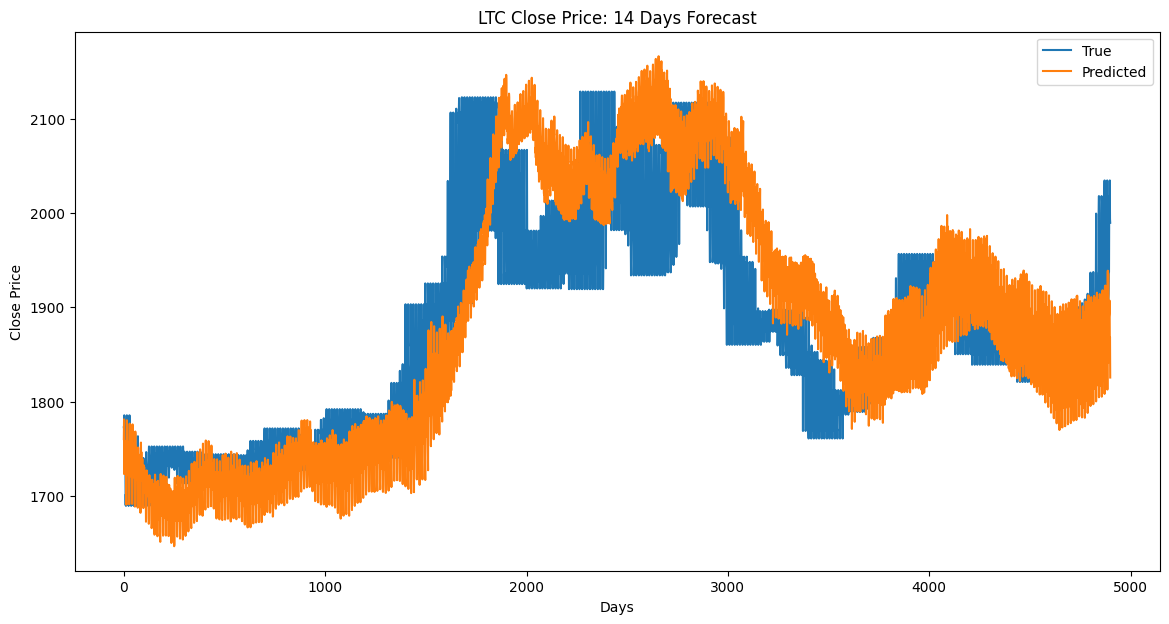

Saved BD-LSTM+Attention model for LTC

====== Processing Gold ======


C:\Users\allif\AppData\Local\Temp\ipykernel_5080\3813031924.py:14: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = KerasRegressor(build_fn=build_bd_lstm_attention_model, verbose=0)


Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END batch_size=32, dropout=0.1, epochs=10, lstm_units=32; total time=  26.8s
[CV] END batch_size=32, dropout=0.1, epochs=10, lstm_units=32; total time=  42.2s
[CV] END batch_size=32, dropout=0.1, epochs=10, lstm_units=32; total time=  59.9s
[CV] END batch_size=32, dropout=0.1, epochs=15, lstm_units=32; total time=  36.2s
[CV] END batch_size=32, dropout=0.1, epochs=15, lstm_units=32; total time=  57.8s
[CV] END batch_size=32, dropout=0.1, epochs=15, lstm_units=32; total time= 1.3min
[CV] END batch_size=16, dropout=0.1, epochs=10, lstm_units=32; total time=  34.8s
[CV] END batch_size=16, dropout=0.1, epochs=10, lstm_units=32; total time= 1.0min
[CV] END batch_size=16, dropout=0.1, epochs=10, lstm_units=32; total time= 1.1min
[CV] END batch_size=32, dropout=0.2, epochs=15, lstm_units=32; total time=  25.7s
[CV] END batch_size=32, dropout=0.2, epochs=15, lstm_units=32; total time=  40.8s
[CV] END batch_size=32, dropout=0.2, e

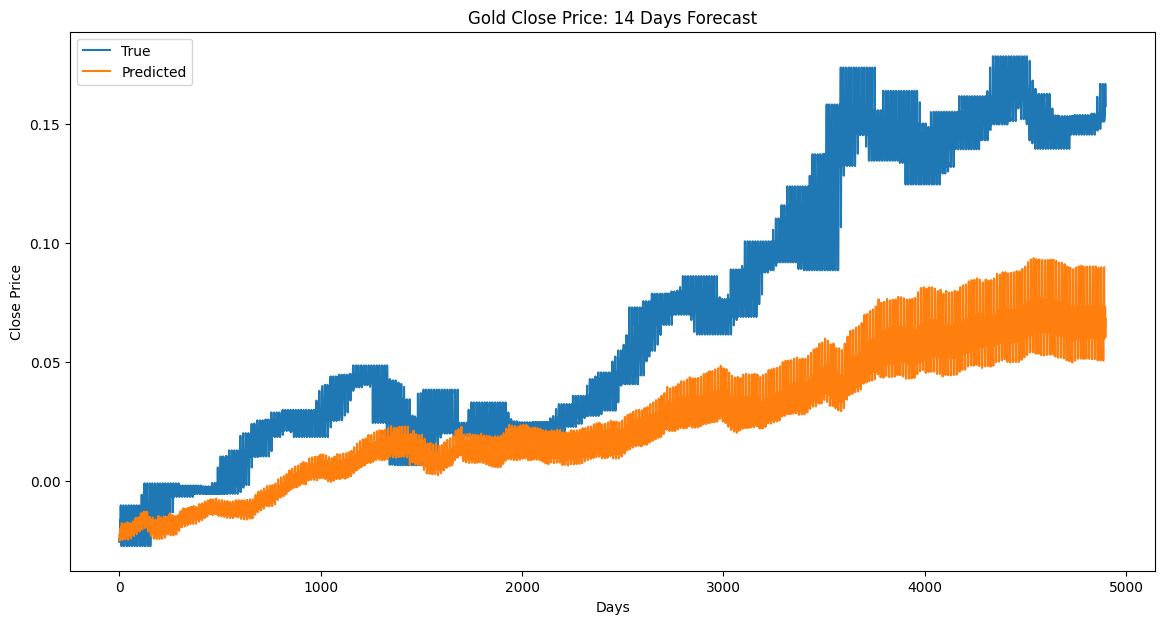

Saved BD-LSTM+Attention model for Gold


In [7]:
# --- Model Training Loop with Hyperparameter Tuning ---
for coin, info in coins.items():
    print(f"\n====== Processing {coin} ======")
    target_col = info['col']
    col_index = scaled_df.columns.get_loc(target_col)
    
    X, Y = create_sliding_window(scaled_df, lookback, forecast_horizon, feature_cols, target_col)
    split = int(0.8 * len(X))
    X_train, X_test = X[:split], X[split:]
    Y_train, Y_test = Y[:split], Y[split:]
    Y_train_flat = Y_train.reshape(-1, forecast_horizon)
    Y_test_flat = Y_test.reshape(-1, forecast_horizon)
    
    keras_reg = KerasRegressor(build_fn=build_bd_lstm_attention_model, verbose=0)
    param_dist = {
        "lstm_units": [32, 64],
        "dropout": [0.1, 0.2],
        "batch_size": [16, 32],
        "epochs": [10, 15]
    }
    tscv = TimeSeriesSplit(n_splits=3)
    search = RandomizedSearchCV(
        keras_reg, param_distributions=param_dist, n_iter=4,
        cv=tscv, verbose=2, n_jobs=1
    )
    search.fit(X_train, Y_train_flat)
    print(f"Best hyperparameters for {coin}: {search.best_params_}")

    # Retrain
    best = search.best_params_
    best_model = build_bd_lstm_attention_model(
        lstm_units=best["lstm_units"],
        dropout=best["dropout"]
    )
    best_model.fit(
        X_train, Y_train_flat,
        epochs=best["epochs"],
        batch_size=best["batch_size"],
        verbose=2
    )
    
    # --- Evaluation ---
    y_pred = best_model.predict(X_test).reshape(-1, forecast_horizon)
    true_unscaled = inverse_close(Y_test_flat, scaler, col_index)
    pred_unscaled = inverse_close(y_pred, scaler, col_index)
    mae = mean_absolute_error(true_unscaled, pred_unscaled)
    rmse = mean_squared_error(true_unscaled, pred_unscaled, squared=False)
    r2 = r2_score(true_unscaled, pred_unscaled)
    print(f"{coin} MAE: {mae:.2f} | RMSE: {rmse:.2f} | R2: {r2:.4f}")

    # --- Plotting ---
    plt.figure(figsize=(14, 7))
    plt.plot(true_unscaled.flatten(), label='True')
    plt.plot(pred_unscaled.flatten(), label='Predicted')
    plt.title(f"{coin} Close Price: 14 Days Forecast")
    plt.xlabel('Days')
    plt.ylabel('Close Price')
    plt.legend()
    plt.show()
    
    # --- Save Model ---
    best_model.save(f"{coin.lower()}_bd_lstm_attention_14d_model.h5")
    print(f"Saved BD-LSTM+Attention model for {coin}")

